# Multi-class Classification with Tensorlow

To practice multi-class classification, we're try to build a neural network to classify images of different item of clothing.

We try to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket.  for this project we will use the  [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. 



#### Dataset information
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [53]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [54]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [55]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

(<matplotlib.image.AxesImage at 0x7f2f344689d0>, 9)

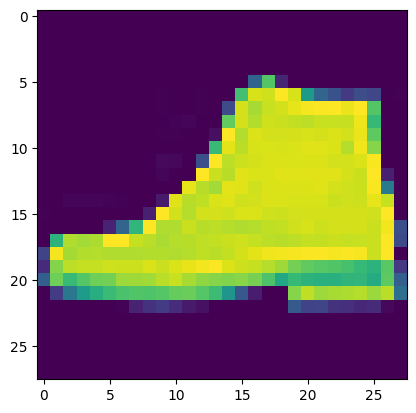

In [56]:
plt.imshow(train_data[42]),train_labels[42]

In [57]:
class_names = ["T-shirt/top","Trouser", "Pullover",
               "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]

In [58]:
len(class_names), len(train_data)

(10, 60000)

In [59]:
NUM_CHOICE = 19500 #@param {type:"slider", min:0, max:60000, step:500}

Text(0.5, 1.0, 'Coat')

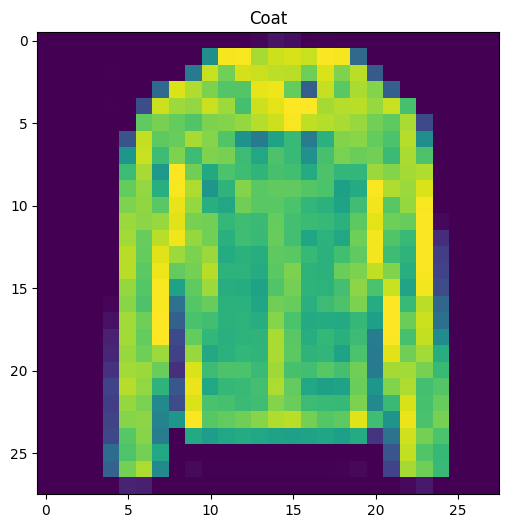

In [60]:
plt.figure(figsize=(6, 6))
plt.imshow(train_data[NUM_CHOICE], cmap = plt.cm.viridis)
plt.title(class_names[train_labels[NUM_CHOICE]])

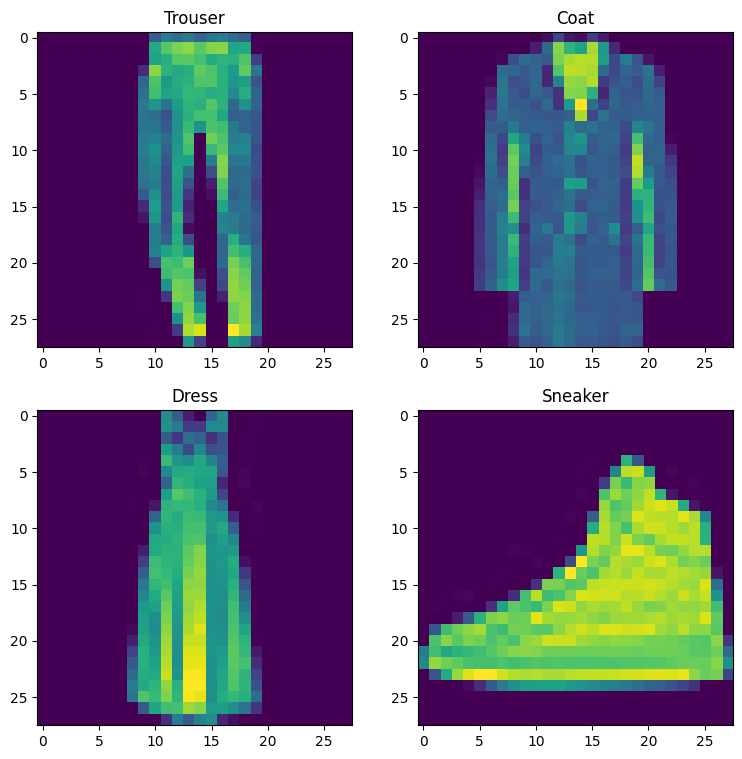

In [61]:
import random 
plt.figure(figsize=(9, 9))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap = plt.cm.viridis)
  plt.title(class_names[train_labels[random_index]])
  
  

## Building a multi-class Classification Model

* Input shape = 28 x 28 (The shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss funtion = tf.keras.losses.CateforicalCrosstentropy()
  * More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
* Output activation = Softmax 


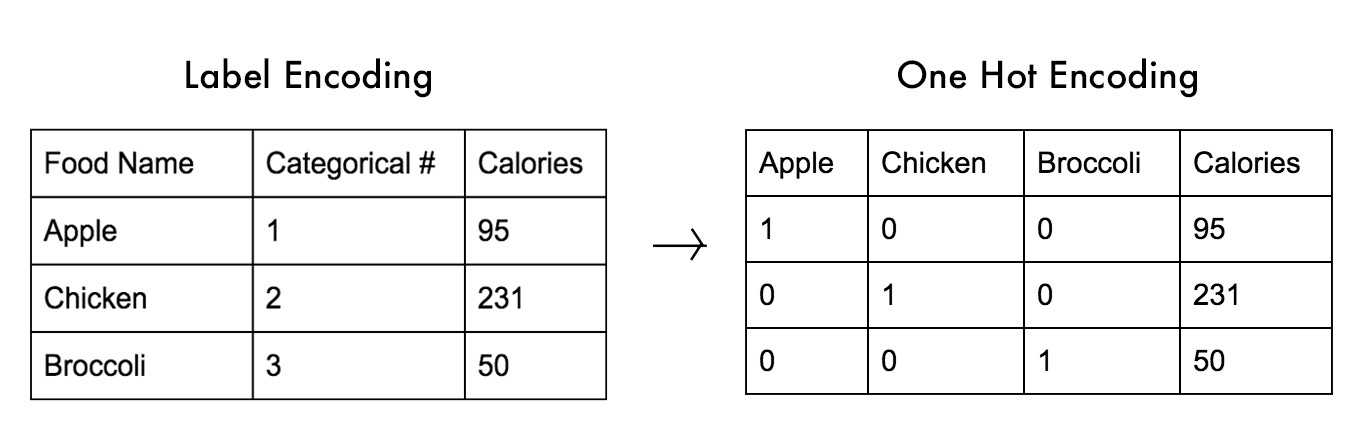

In [62]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)

])
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

non_norm_history = model_1.fit(train_data, train_labels,
                             epochs = 10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 2.3757 - accuracy: 0.0988 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2776 - accuracy: 0.1119 - val_loss: 2.1474 - val_accuracy: 0.1472
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9692 - accuracy: 0.2260 - val_loss: 1.7183 - val_accuracy: 0.2955
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6313 - accuracy: 0.3053 - val_loss: 1.5658 - val_accuracy: 0.3256
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5417 - accuracy: 0.3359 - val_loss: 1.5042 - val_accuracy: 0.3634
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4500 - accuracy: 0.3864 - val_loss: 1.3697 - val_accuracy: 0.4300
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3115 - accuracy: 0.4403 - val_loss: 1.3001 - val_accuracy:

In [63]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [64]:
train_data.min(), train_data.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (known as scaling or normalization).


In [65]:
# Divide train and test images by the maximum value (normalize it)

In [66]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [67]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')    
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

norm_history = model_2.fit(train_data, train_labels,
                             epochs = 10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3597 - accuracy: 0.4579 - val_loss: 1.0753 - val_accuracy: 0.5996
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8335 - accuracy: 0.6883 - val_loss: 0.7692 - val_accuracy: 0.7072
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7134 - accuracy: 0.7288 - val_loss: 0.7135 - val_accuracy: 0.7332
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6723 - accuracy: 0.7413 - val_loss: 0.6793 - val_accuracy: 0.7358
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6491 - accuracy: 0.7495 - val_loss: 0.6653 - val_accuracy: 0.7388
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6311 - accuracy: 0.7557 - val_loss: 0.6644 - val_accuracy: 0.7457
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6200 - accuracy: 0.7608 - val_loss: 0.6489 - val_accuracy:

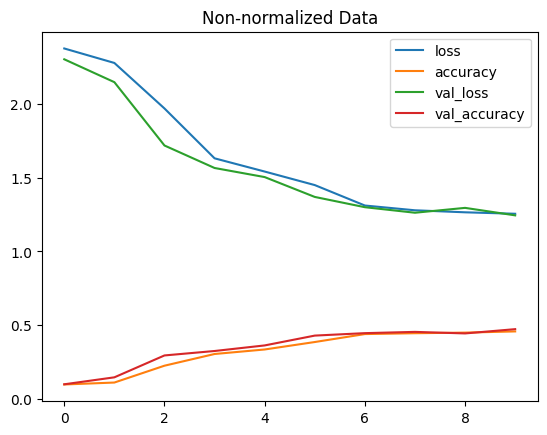

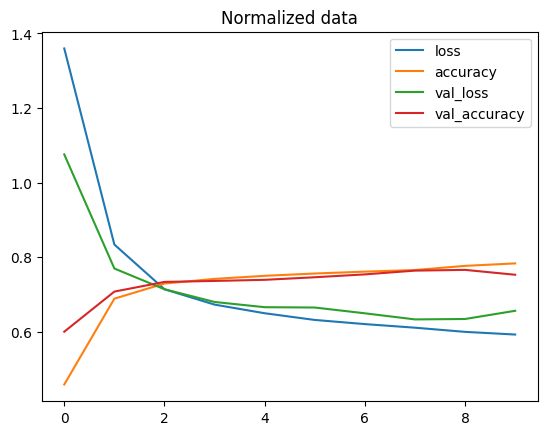

In [68]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized data");

### Finding Optimum Learning Rate

In [69]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_3.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
find_lr_history = model_3.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler],
                               verbose=0)

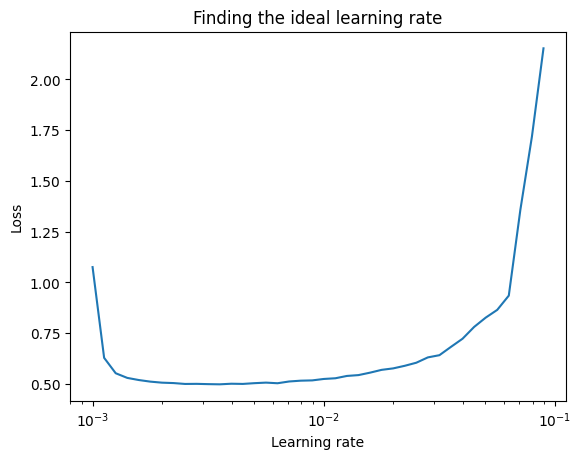

In [70]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [71]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

history = model_4.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels),verbose=0)

In [72]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Reds) # darker better
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  threshold = (cm.max() + cm.min()) / 2.
  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [73]:
# Make predictions with the most recent model
y_probs = model_4.predict(test_data)
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[9.66468502e-11, 2.46240257e-13, 2.05940509e-09, 2.19535110e-07,
        1.02973945e-05, 2.04201743e-01, 1.06881004e-07, 2.86649674e-01,
        4.81855450e-03, 5.04319429e-01],
       [1.21872744e-03, 6.98551893e-12, 8.96460533e-01, 3.42732790e-07,
        4.42544557e-02, 1.46370223e-20, 5.80622517e-02, 1.27354130e-27,
        3.73502735e-06, 3.02783582e-35],
       [1.55282132e-02, 9.55785036e-01, 1.46076479e-03, 2.32806895e-02,
        3.58589285e-04, 2.62219578e-06, 3.54523165e-03, 6.28458139e-08,
        3.82037870e-05, 5.44479690e-07],
       [1.01047903e-02, 9.40485537e-01, 4.63852985e-03, 2.74955723e-02,
        2.69189035e-03, 3.70206125e-03, 6.94543077e-03, 1.89843820e-03,
        5.16526867e-04, 1.52126921e-03],
       [1.63845271e-01, 5.04015516e-05, 2.58882821e-01, 1.45164225e-02,
        8.35809335e-02, 2.33974320e-12, 4.77954328e-01, 1.50047651e-17,
        1.16981124e-03, 4.95733942e-19]], dtype=float32)

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.

In [74]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [75]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

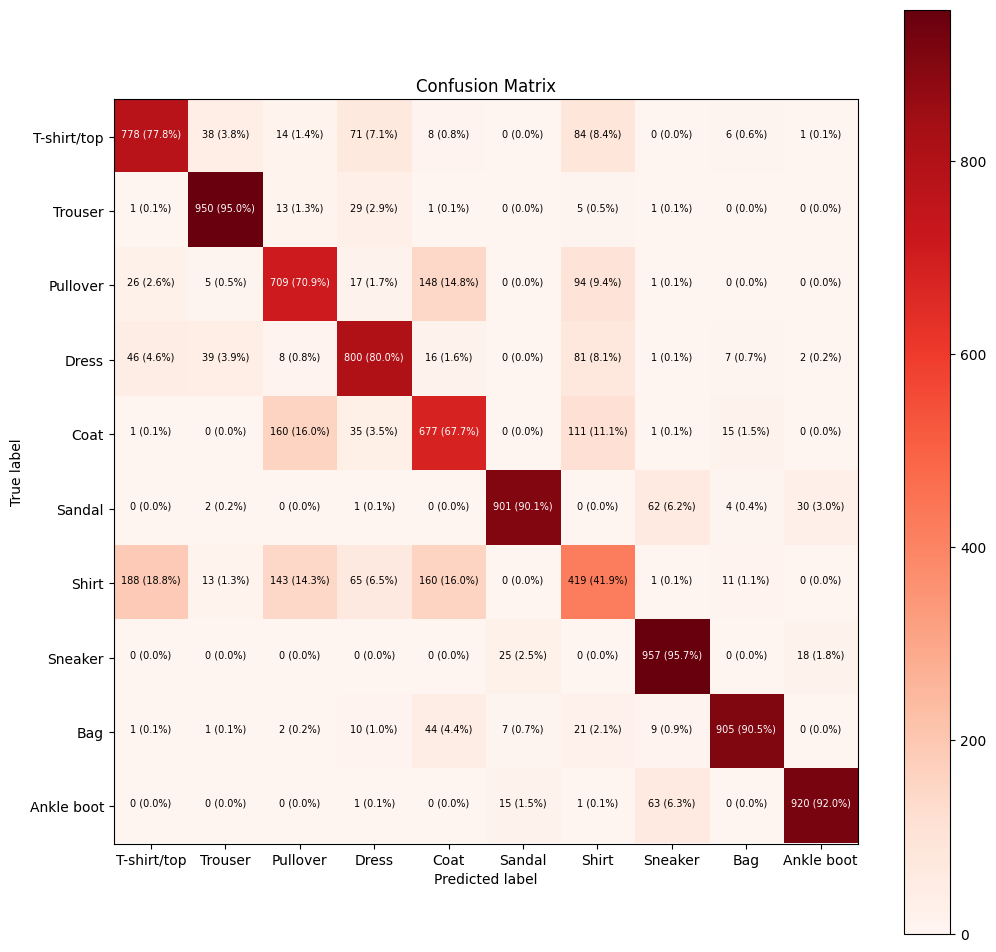

In [76]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(12, 12),
                      text_size=7)

In [104]:
def plot_predictions(model, images, true_labels, classes):
  i = random.randint(0, len(test_data))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  plt.title("{} {:2.0f}% ".format(pred_label,
                                  100*tf.reduce_max(pred_probs),
                                  true_label),
                                  color="Orange")

1/1 [==============================] - 0s 19ms/step


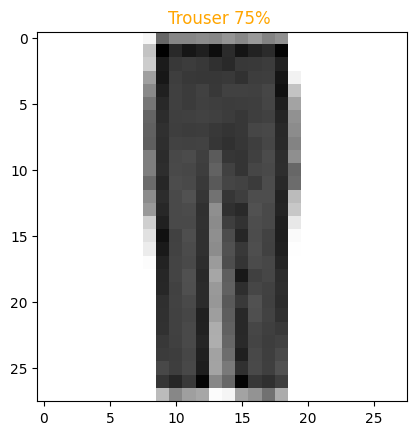

In [105]:
plot_predictions(model_4, test_data, test_labels, class_names)

1/1 [==============================] - 0s 19ms/step


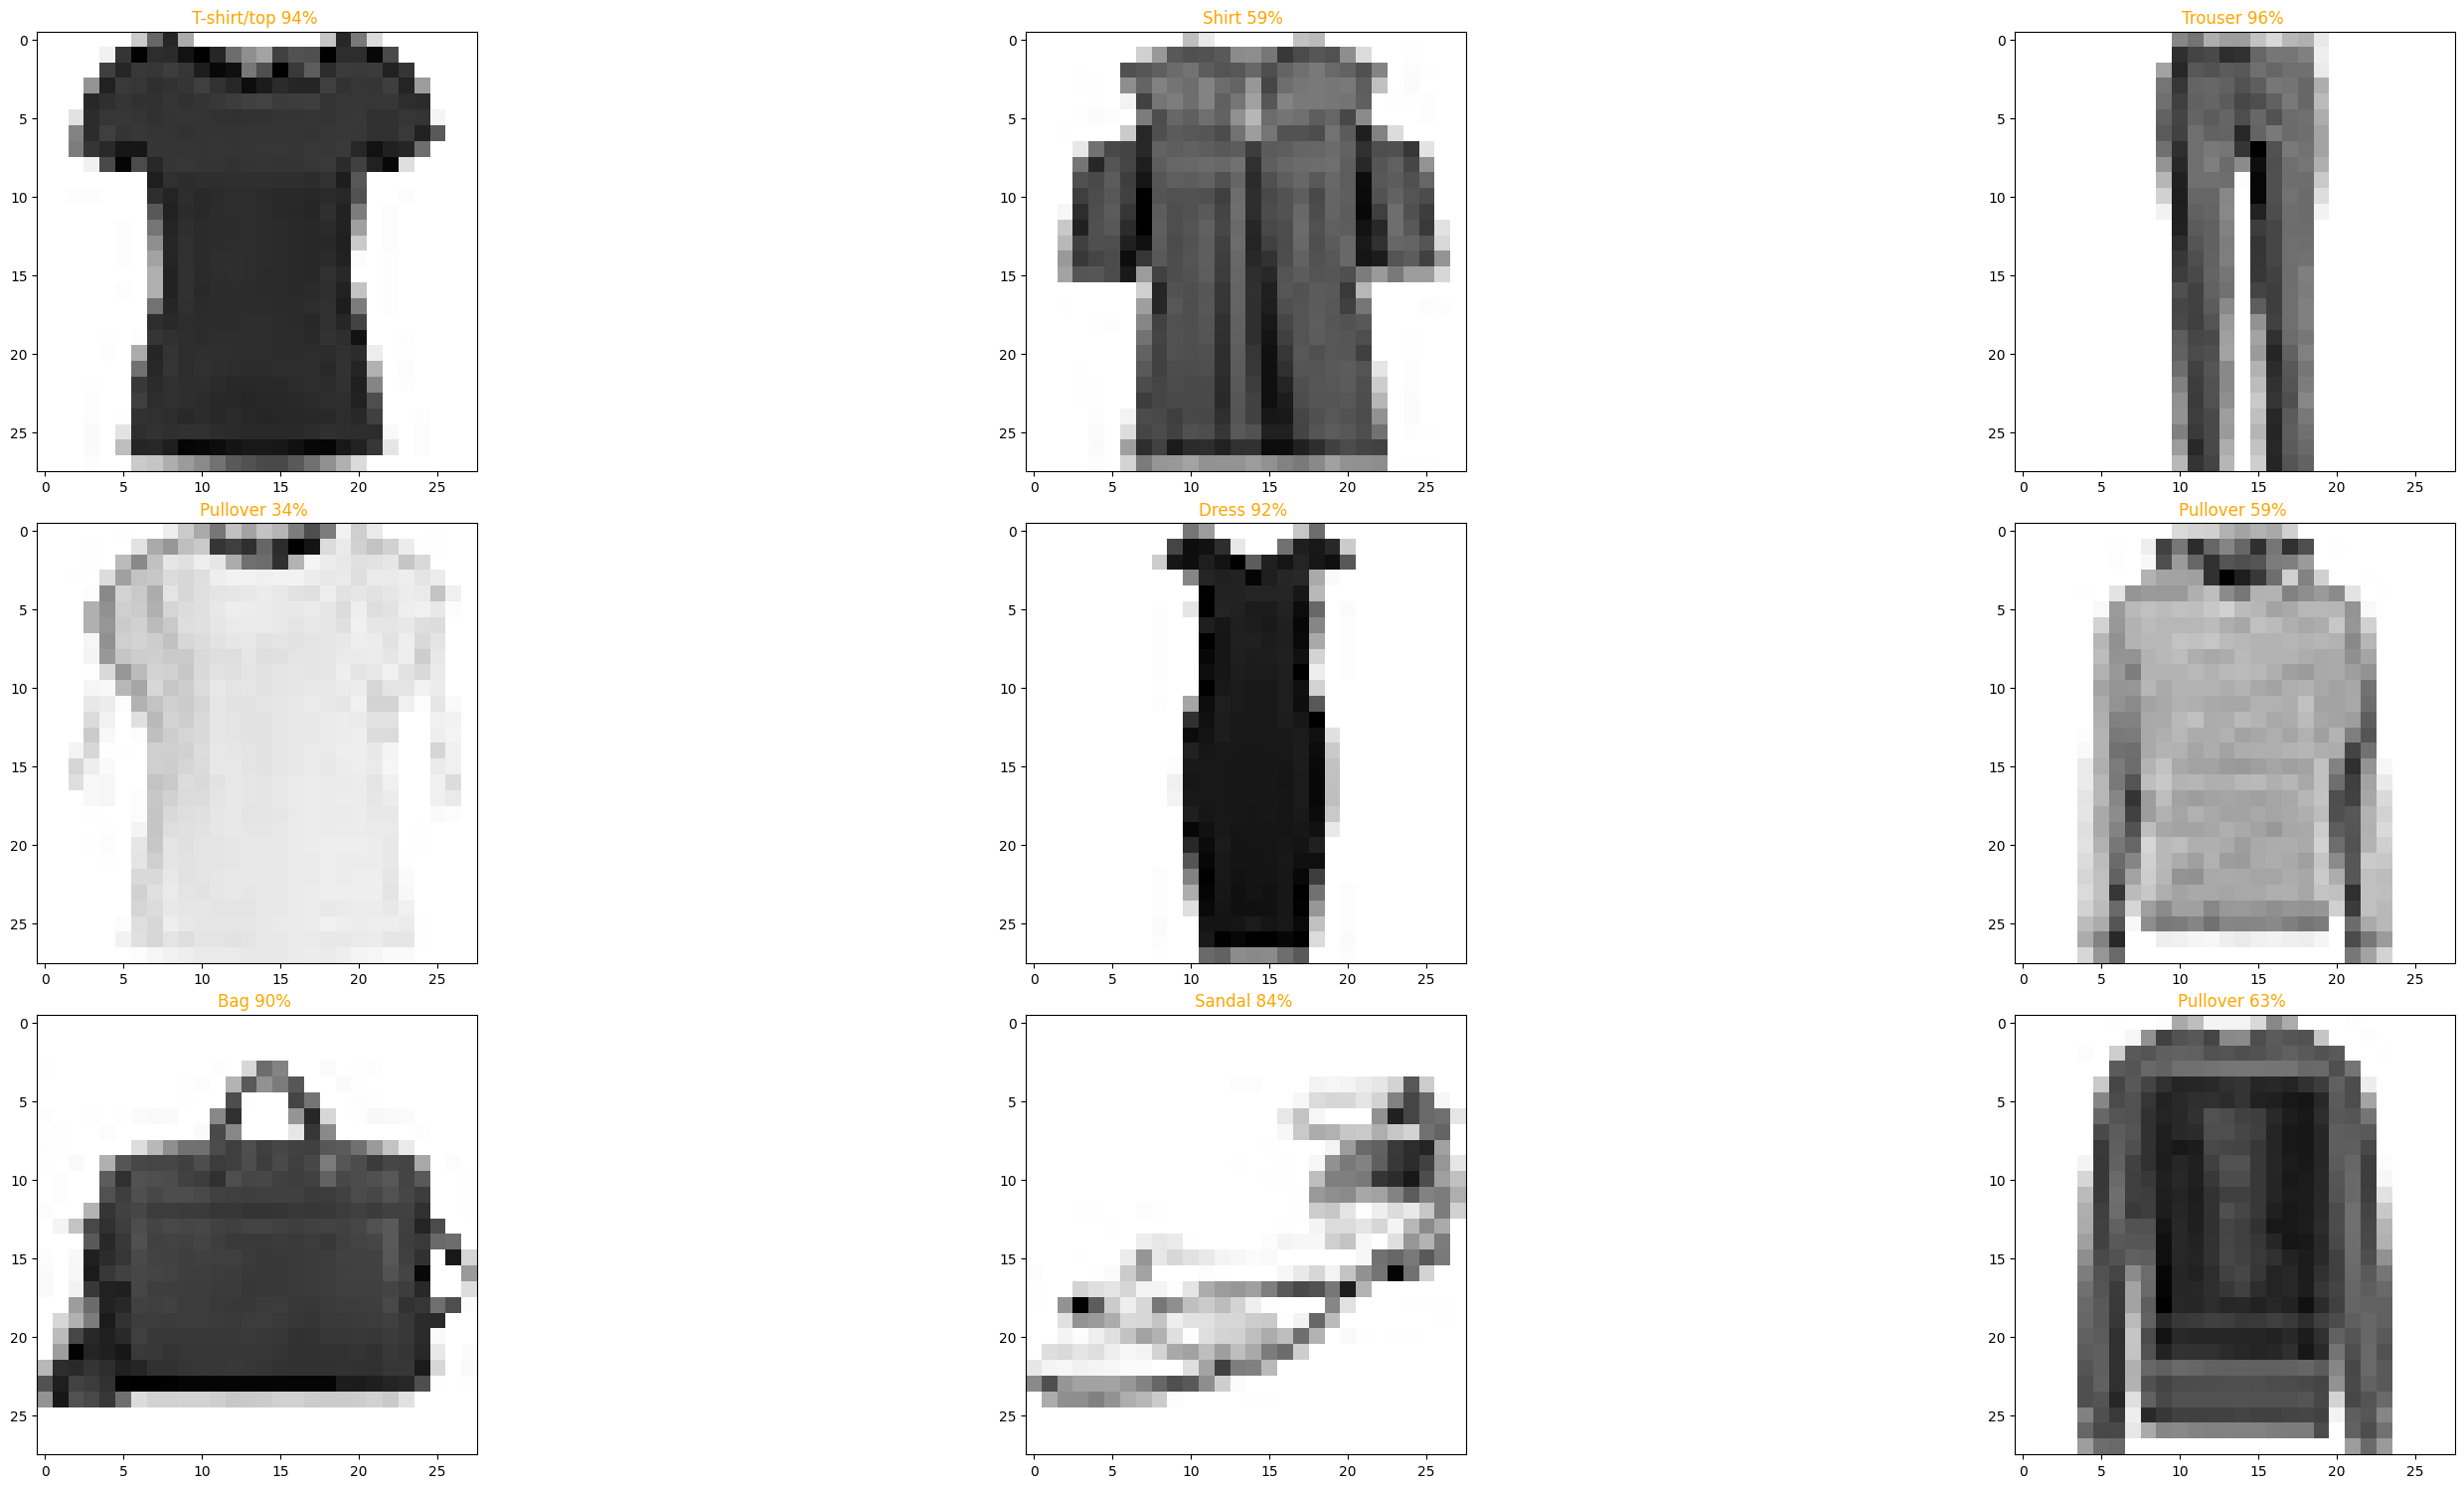

In [106]:
selective = 1
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_predictions(model_4, test_data, test_labels, class_names)

plt.tight_layout(h_pad=1.0)
plt.show()